<h1 style="color: #AA1358;">INITIAL SET UP</h1>

<h2 style="color: #A4064D;">Libraries</h2>

In [1]:
## Basic libraries
import pandas as pd # data manipulation
import numpy as np # funciones matemáticas

## EDA Libraries 
import matplotlib.pyplot as plt
import seaborn as sns

## Settings
pd.set_option('display.max_columns', None) # display all columns
import warnings
warnings.filterwarnings('ignore') # ignore warnings

<h2 style="color: #A4064D;">Data Standardization</h2>

<h3 style="color: #6D183F;">Data extraction</h3>

In [2]:
data = pd.read_excel("marketing_campaign.xlsx")

In [3]:
data.columns = data.columns.str.lower().str.replace(" ","_")

In [4]:
data.head(5)

,id,year_birth,education,marital_status,income,kidhome,teenhome,dt_customer,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,z_costcontact,z_revenue,response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


<h3 style="color: #6D183F;">Columns content explanation</h3>

- **AcceptedCmp1** - 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- **AcceptedCmp2** - 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- **AcceptedCmp3** - 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- **AcceptedCmp4** - 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- **AcceptedCmp5** - 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- **Response** - 1 if customer accepted the offer in the last campaign, 0 otherwise
- **Complain** - 1 if customer complained in the last 2 years
- **DtCustomer** - date of customer’s enrolment with the company
- **Education** - customer’s level of education
- **Marital** - customer’s marital status
- **Kidhome** - number of small children in customer’s household
- **Teenhome** - number of teenagers in customer’s household
- **Income** - customer’s yearly household income
- **MntFishProducts** - amount spent on fish products in the last 2 years
- **MntMeatProducts** - amount spent on meat products in the last 2 years
- **MntFruits** - amount spent on fruits products in the last 2 years
- **MntSweetProducts** - amount spent on sweet products in the last 2 years
- **MntWines** - amount spent on wine products in the last 2 years
- **MntGoldProds** - amount spent on gold products in the last 2 years
- **NumDealsPurchases** - number of purchases made with discount
- **NumCatalogPurchases** - number of purchases made using catalogue
- **NumStorePurchases** - number of purchases made directly in stores
- **NumWebPurchases** - number of purchases made through company’s web site
- **NumWebVisitsMonth** - number of visits to company’s web site in the last month
- **Recency** - number of days since the last purchase

<h3 style="color: #6D183F;">First Exploration</h3>

In [5]:
data.shape

(2240, 29)

In [6]:
data.dtypes

id                       int64
year_birth               int64
education               object
marital_status          object
income                 float64
kidhome                  int64
teenhome                 int64
dt_customer             object
recency                  int64
mntwines                 int64
mntfruits                int64
mntmeatproducts          int64
mntfishproducts          int64
mntsweetproducts         int64
mntgoldprods             int64
numdealspurchases        int64
numwebpurchases          int64
numcatalogpurchases      int64
numstorepurchases        int64
numwebvisitsmonth        int64
acceptedcmp3             int64
acceptedcmp4             int64
acceptedcmp5             int64
acceptedcmp1             int64
acceptedcmp2             int64
complain                 int64
z_costcontact            int64
z_revenue                int64
response                 int64
dtype: object

In [7]:
data.dtypes.value_counts()

int64      25
object      3
float64     1
Name: count, dtype: int64

- First Impressions:
    1. This dataset contains a total of **2240 entries** and **29 columns** corresponding to clients information and their related activities with our business.
    2. Almost all data types are numeric (**25 integers** and **1 float**). Then, we have **3 objects**.
    3. Our first impression is that in the **categorical variables we will need to group and transform the values for optimization**. And we will see for the numeric variables, because some of them are one hot encoding, others are continual and some discrete. 
    4. After this first look, our main objective will be to demographically sectorize the type of customer that participates in our campaigns in order to **detect which is our best type of customer**.
    5. 

<h3 style="color: #6D183F;">Cheking up: nulls/duplicates/blank spaces</h3>

In [8]:
# Let's make a copy for further modifications

df = data.copy()

In [9]:
# We apreciate some lack of standarization on columns about the amount buyed per categorie
# So let's make some changes

- **mntfishproducts** - amount spent on fish products in the last 2 years
- **mntmeatproducts** - amount spent on meat products in the last 2 years
- **mntfruits** - amount spent on fruits products in the last 2 years
- **mntsweetproducts** - amount spent on sweet products in the last 2 years
- **mntwines** - amount spent on wine products in the last 2 years
- **mntgoldprods** - amount spent on gold products in the last 2 years

In [10]:
df.rename(columns={"mntfishproducts": "fish_products"}, inplace=True)
df.rename(columns={"mntwines": "wine_products"}, inplace=True)
df.rename(columns={"mntfruits":"fruit_products"}, inplace=True)
df.rename(columns={"mntmeatproducts":"meat_products"}, inplace=True)
df.rename(columns={"mntsweetproducts":"sweet_products"}, inplace=True)
df.rename(columns={"mntgoldprods":"gold_products"}, inplace=True)

In [11]:
# Same with purchase's type. Let's make a few more changes

- **numdealspurchases** - number of purchases made with discount
- **numcatalogpurchases** - number of purchases made using catalogue
- **numstorepurchases** - number of purchases made directly in stores
- **numwebpurchases** - number of purchases made through company’s web site
- **numwebvisitsmonth** - number of visits to company’s web site in the last month

In [12]:
df.rename(columns={"numdealspurchases": "deal_purchases"}, inplace=True)
df.rename(columns={"numcatalogpurchases": "catalog_purchases"}, inplace=True)
df.rename(columns={"numstorepurchases":"store_purchases"}, inplace=True)
df.rename(columns={"numwebpurchases":"web_purchases"}, inplace=True)
df.rename(columns={"numwebvisitsmonth":"web_visits_permonth"}, inplace=True)

In [13]:
# How many nulls do we have?

df.isnull().sum()

id                      0
year_birth              0
education               0
marital_status          0
income                 24
kidhome                 0
teenhome                0
dt_customer             0
recency                 0
wine_products           0
fruit_products          0
meat_products           0
fish_products           0
sweet_products          0
gold_products           0
deal_purchases          0
web_purchases           0
catalog_purchases       0
store_purchases         0
web_visits_permonth     0
acceptedcmp3            0
acceptedcmp4            0
acceptedcmp5            0
acceptedcmp1            0
acceptedcmp2            0
complain                0
z_costcontact           0
z_revenue               0
response                0
dtype: int64

In [14]:
# Income is the only one variable with null values (24). Let's check if its worthy to fill

print(df["income"].isnull().sum()/df.shape[0]*100)


1.0714285714285714


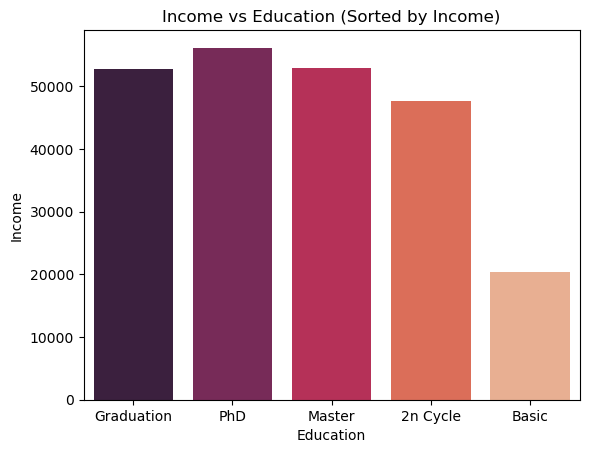

In [15]:
# nulls at "income" are just 1%. We could drop it but lets treat them to prevent any original entries
# We have the hypothesis that education could have a close relation with income

income_sorted = df.sort_values(by="income", ascending=False)
sns. barplot(data=income_sorted, x="education", y="income", errorbar=None, palette="rocket")
plt.xlabel('Education')
plt.ylabel('Income')
plt.title('Income vs Education (Sorted by Income)')
plt.show()

In [16]:
# There is a close relationship between the grade of education and their anual incomes
# So we can fill NaN values at "income" with the median by their "edutacion" category
# We will use median instead of mean because all values at income are .0 rounded

edu_income_mean = df.groupby("education")["income"].median().round(1)
edu_income_mean

education
2n Cycle      46805.0
Basic         20744.0
Graduation    52028.5
Master        50943.0
PhD           55212.0
Name: income, dtype: float64

In [17]:
edu_income_mean = dict(edu_income_mean)
edu_income_mean

{'2n Cycle': 46805.0,
 'Basic': 20744.0,
 'Graduation': 52028.5,
 'Master': 50943.0,
 'PhD': 55212.0}

In [18]:
# We fill NaN at "income" by mapping their values from "education" dictionary

df['income'] = df['income'].fillna(df['education'].map(edu_income_mean))

In [19]:
# All nulls removed

df["income"].isnull().sum()

0

In [20]:
# Now let's check for duplicates

df.duplicated().sum()

0

In [21]:
# And for blanck spaces

df.eq(" ").sum()

id                     0
year_birth             0
education              0
marital_status         0
income                 0
kidhome                0
teenhome               0
dt_customer            0
recency                0
wine_products          0
fruit_products         0
meat_products          0
fish_products          0
sweet_products         0
gold_products          0
deal_purchases         0
web_purchases          0
catalog_purchases      0
store_purchases        0
web_visits_permonth    0
acceptedcmp3           0
acceptedcmp4           0
acceptedcmp5           0
acceptedcmp1           0
acceptedcmp2           0
complain               0
z_costcontact          0
z_revenue              0
response               0
dtype: int64

<h3 style="color: #6D183F;">Treating the variables</h3>

In [22]:
# Let's check again the df

df.head(5)

,id,year_birth,education,marital_status,income,kidhome,teenhome,dt_customer,recency,wine_products,fruit_products,meat_products,fish_products,sweet_products,gold_products,deal_purchases,web_purchases,catalog_purchases,store_purchases,web_visits_permonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,z_costcontact,z_revenue,response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [23]:
# We observe that "z_costcontact" and "z_costcontact" have the same value for all rows, so they are expendables

df.drop(columns=["z_costcontact","z_revenue"], inplace=True)

In [24]:
# Let's deal with dt_customer. It's an object and it will be better if it is a datetime type

df["dt_customer"] = pd.to_datetime(df["dt_customer"], format="%Y-%m-%d")

In [25]:
# Columns "kidhome" and "teenhome" can be unified in a single column named "childrenhome"

childrenhome = df[["kidhome","teenhome"]].sum(axis=1)
childrenhome

0       0
1       2
2       0
3       1
4       1
       ..
2235    1
2236    3
2237    0
2238    1
2239    2
Length: 2240, dtype: int64

In [26]:
df.insert(loc=5, column="childrenhome", value=childrenhome)

In [27]:
df.drop(columns=["kidhome","teenhome"], inplace=True)

In [28]:
# "childrenhome" unification match with kid+teen dropped sum

df.head(5)

,id,year_birth,education,marital_status,income,childrenhome,dt_customer,recency,wine_products,fruit_products,meat_products,fish_products,sweet_products,gold_products,deal_purchases,web_purchases,catalog_purchases,store_purchases,web_visits_permonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,response
0,5524,1957,Graduation,Single,58138.0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,2,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0


In [29]:
# Now let's check marital status

df["marital_status"].value_counts()

marital_status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

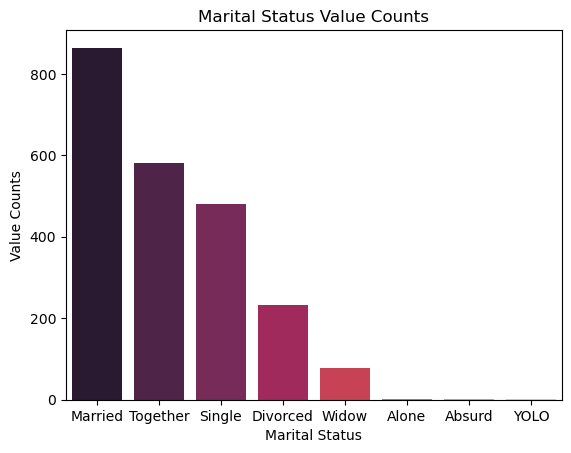

In [30]:
marital_status_counts = df['marital_status'].value_counts()

sns. barplot(x=marital_status_counts.index, y=marital_status_counts.values, errorbar=None, palette="rocket")
plt.xlabel('Marital Status')
plt.ylabel('Value Counts')
plt.title('Marital Status Value Counts')
plt.show()

In [31]:
# We identify 5 pricipal categories
#" Alone" is just "Single", so let's unificate them

df["marital_status"].replace("Alone","Single", inplace=True)

In [32]:
# Let's take a look to "Absurd" and "Yolo", because their label has no sense

df[(df["marital_status"] == "Absurd") | (df["marital_status"] == "YOLO")]

,id,year_birth,education,marital_status,income,childrenhome,dt_customer,recency,wine_products,fruit_products,meat_products,fish_products,sweet_products,gold_products,deal_purchases,web_purchases,catalog_purchases,store_purchases,web_visits_permonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,response
2093,7734,1993,Graduation,Absurd,79244.0,0,2012-12-19,58,471,102,125,212,61,245,1,4,10,7,1,0,0,1,1,0,0,1
2134,4369,1957,Master,Absurd,65487.0,0,2014-01-10,48,240,67,500,199,0,163,3,3,5,6,2,0,0,0,0,0,0,0
2177,492,1973,PhD,YOLO,48432.0,1,2012-10-18,3,322,3,50,4,3,42,5,7,1,6,8,0,0,0,0,0,0,0
2202,11133,1973,PhD,YOLO,48432.0,1,2012-10-18,3,322,3,50,4,3,42,5,7,1,6,8,0,0,0,0,0,0,1


In [33]:
# Have a look to df describe to see if "Absurd"/"YOLO" have any significance

df.describe().T

,count,mean,min,25%,50%,75%,max,std
id,2240.0,5592.159821,0.0,2828.25,5458.5,8427.75,11191.0,3246.662198
year_birth,2240.0,1968.805804,1893.0,1959.0,1970.0,1977.0,1996.0,11.984069
income,2240.0,52242.594866,1730.0,35538.75,51498.5,68289.75,666666.0,25039.061738
childrenhome,2240.0,0.950446,0.0,0.0,1.0,1.0,3.0,0.751803
dt_customer,2240,2013-07-10 10:01:42.857142784,2012-07-30 00:00:00,2013-01-16 00:00:00,2013-07-08 12:00:00,2013-12-30 06:00:00,2014-06-29 00:00:00,NaN
recency,2240.0,49.109375,0.0,24.0,49.0,74.0,99.0,28.962453
wine_products,2240.0,303.935714,0.0,23.75,173.5,504.25,1493.0,336.597393
fruit_products,2240.0,26.302232,0.0,1.0,8.0,33.0,199.0,39.773434
meat_products,2240.0,166.95,0.0,16.0,67.0,232.0,1725.0,225.715373
fish_products,2240.0,37.525446,0.0,3.0,12.0,50.0,259.0,54.628979


In [34]:
# We can't observe any unique signficances between "Absurd"/"YOLO" values and df statistical, so we will drop them

m_status_drop = df[(df["marital_status"] == "Absurd") | (df["marital_status"] == "YOLO")]
m_status_drop.index

Index([2093, 2134, 2177, 2202], dtype='int64')

In [35]:
df.drop(index=m_status_drop.index, inplace=True)

In [36]:
# Now let's transform "year_birth" into "age" for a better visualization and comprehension

age = 2024 - df["year_birth"]
age

0       67
1       70
2       59
3       40
4       43
        ..
2235    57
2236    78
2237    43
2238    68
2239    70
Name: year_birth, Length: 2236, dtype: int64

In [37]:
df.insert(loc=1, column="age", value=age)

In [38]:
df.drop(columns=["year_birth"], inplace=True)

In [39]:
df.head(1)

,id,age,education,marital_status,income,childrenhome,dt_customer,recency,wine_products,fruit_products,meat_products,fish_products,sweet_products,gold_products,deal_purchases,web_purchases,catalog_purchases,store_purchases,web_visits_permonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,response
0,5524,67,Graduation,Single,58138.0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1


In [40]:
df["complain"].value_counts()

complain
0    2215
1      21
Name: count, dtype: int64

In [41]:
# Exploring the amount products buyed per categorie, we could add a new column to show the total spend per client

total_products = df[["wine_products","fruit_products","meat_products","fish_products","sweet_products","gold_products"]].sum(axis=1)

In [42]:
df.columns.get_loc("gold_products")

13

In [43]:
df.insert(loc=14, column="total_products", value=total_products)

In [44]:
# We could do for purchases the same we did for the amount spend per products

total_purchases = df[["web_purchases","catalog_purchases","store_purchases"]].sum(axis=1)
df.columns.get_loc("store_purchases")

18

In [45]:
df.insert(loc=19, column="total_purchases", value=total_purchases)

In [46]:
# Now we have more comprehension about totalities in their actions

df.head(5)

,id,age,education,marital_status,income,childrenhome,dt_customer,recency,wine_products,fruit_products,meat_products,fish_products,sweet_products,gold_products,total_products,deal_purchases,web_purchases,catalog_purchases,store_purchases,total_purchases,web_visits_permonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,response
0,5524,67,Graduation,Single,58138.0,0,2012-09-04,58,635,88,546,172,88,88,1617,3,8,10,4,22,7,0,0,0,0,0,0,1
1,2174,70,Graduation,Single,46344.0,2,2014-03-08,38,11,1,6,2,1,6,27,2,1,1,2,4,5,0,0,0,0,0,0,0
2,4141,59,Graduation,Together,71613.0,0,2013-08-21,26,426,49,127,111,21,42,776,1,8,2,10,20,4,0,0,0,0,0,0,0
3,6182,40,Graduation,Together,26646.0,1,2014-02-10,26,11,4,20,10,3,5,53,2,2,0,4,6,6,0,0,0,0,0,0,0
4,5324,43,PhD,Married,58293.0,1,2014-01-19,94,173,43,118,46,27,15,422,5,5,3,6,14,5,0,0,0,0,0,0,0


In [47]:
# Let's add another column, this time to sumarize the total of campaings accepted per client

total_cmp = df[["acceptedcmp1","acceptedcmp2","acceptedcmp3","acceptedcmp4","acceptedcmp5"]].sum(axis=1)
df.columns.get_loc("acceptedcmp2")

25

In [48]:
df.insert(loc=26, column="total_cmp", value=total_cmp)

<h2 style="color: #A4064D;">Exporting CSV for EDA</h2>

In [49]:
# All dataset formated into a brand new dataframe to export for it EDA exploration

df.to_csv("for_eda.csv")